In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, Ridge  # noqa F401
from sklearn.metrics import accuracy_score,classification_report
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
titanic_train = pd.read_csv('/train.csv')

In [ ]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
from matplotlib import pyplot as plt
_df_0['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_0' is not defined

In [ ]:
titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

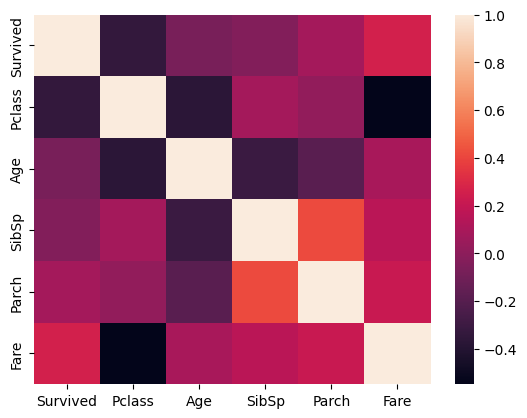

In [ ]:
numeric_columns = titanic_train.select_dtypes(include=['number'])

sns.heatmap(numeric_columns.corr())
plt.show()

In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
imputer = SimpleImputer(strategy='mean')
titanic_train['Age'] = imputer.fit_transform(titanic_train[['Age']])

In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
titanic_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_data = ohe.fit_transform(titanic_train[['Embarked']]).toarray()

In [ ]:
feature_names = ohe.get_feature_names_out(['Embarked'])

In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

In [ ]:
titanic_train = pd.concat([titanic_train, encoded_df], axis=1)

In [ ]:
titanic_train = titanic_train.drop('Embarked', axis=1)


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    object 
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   Embarked_C    891 non-null    float64
 8   Embarked_Q    891 non-null    float64
 9   Embarked_S    891 non-null    float64
 10  Embarked_nan  891 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 76.7+ KB


In [ ]:
ohe2 = OneHotEncoder(handle_unknown='ignore')
encoded_data = ohe2.fit_transform(titanic_train[['Sex']]).toarray()

In [ ]:
feature_names2 = ohe2.get_feature_names_out(['Sex'])

In [ ]:
encoded_df_sex = pd.DataFrame(encoded_data, columns=feature_names2)

In [ ]:
titanic_train = pd.concat([titanic_train, encoded_df_sex], axis=1)

In [ ]:
titanic_train = titanic_train.drop('Sex', axis=1)

In [ ]:
titanic_train["Survived"].count()

891

In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Embarked_C    891 non-null    float64
 7   Embarked_Q    891 non-null    float64
 8   Embarked_S    891 non-null    float64
 9   Embarked_nan  891 non-null    float64
 10  Sex_female    891 non-null    float64
 11  Sex_male      891 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 83.7 KB


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Embarked_C    891 non-null    float64
 7   Embarked_Q    891 non-null    float64
 8   Embarked_S    891 non-null    float64
 9   Embarked_nan  891 non-null    float64
 10  Sex_female    891 non-null    float64
 11  Sex_male      891 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 83.7 KB


In [ ]:
titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1

In [ ]:
titanic_train = titanic_train.drop(['SibSp','Parch'], axis=1)

In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   Fare          891 non-null    float64
 4   Embarked_C    891 non-null    float64
 5   Embarked_Q    891 non-null    float64
 6   Embarked_S    891 non-null    float64
 7   Embarked_nan  891 non-null    float64
 8   Sex_female    891 non-null    float64
 9   Sex_male      891 non-null    float64
 10  FamilySize    891 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 76.7 KB


In [ ]:
titanic_train = titanic_train.drop(['Embarked_nan'], axis=1)


In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Embarked_C  891 non-null    float64
 5   Embarked_Q  891 non-null    float64
 6   Embarked_S  891 non-null    float64
 7   Sex_female  891 non-null    float64
 8   Sex_male    891 non-null    float64
 9   FamilySize  891 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 69.7 KB


In [ ]:
model = LogisticRegression()

In [ ]:

X_train = titanic_train.drop('Survived', axis=1)
y_train = titanic_train['Survived']

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_test = pd.read_csv('/test.csv')

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def preprocess_data(df):

    imputer = SimpleImputer(strategy='mean')
    df['Age'] = imputer.fit_transform(df[['Age']])
    ohe = OneHotEncoder(handle_unknown='ignore')
    encoded_features = ohe.fit_transform(df[['Embarked', 'Sex']]).toarray()
    encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(['Embarked', 'Sex']))
    df = pd.concat([df, encoded_df], axis=1)
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    fare_imputer = SimpleImputer(strategy='mean')

    df[['Fare']] = fare_imputer.fit_transform(df[['Fare']])
    df = df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked',"Parch","SibSp"], axis=1)  # Adjust dropped columns as needed

    return df






In [ ]:
X_test = pd.read_csv('/test.csv')
X_test = preprocess_data(X_test)

In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Embarked_C  891 non-null    float64
 5   Embarked_Q  891 non-null    float64
 6   Embarked_S  891 non-null    float64
 7   Sex_female  891 non-null    float64
 8   Sex_male    891 non-null    float64
 9   FamilySize  891 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 69.7 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   Fare        418 non-null    float64
 3   Embarked_C  418 non-null    float64
 4   Embarked_Q  418 non-null    float64
 5   Embarked_S  418 non-null    float64
 6   Sex_female  418 non-null    float64
 7   Sex_male    418 non-null    float64
 8   FamilySize  418 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 29.5 KB


In [ ]:

y_pred = model.predict(X_test)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_true = pd.read_csv('/gender_submission.csv')
y_true = y_true['Survived']

In [ ]:
classification_report = classification_report(y_true, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.92      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9425837320574163


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_knn))
accuracy_knn = accuracy_score(y_true, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn}")


              precision    recall  f1-score   support

           0       0.76      0.76      0.76       266
           1       0.58      0.58      0.58       152

    accuracy                           0.70       418
   macro avg       0.67      0.67      0.67       418
weighted avg       0.70      0.70      0.70       418

Accuracy (KNN): 0.6961722488038278


In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


print(classification_report(y_true, y_pred_svm))
accuracy_svm = accuracy_score(y_true, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm}")


              precision    recall  f1-score   support

           0       0.68      0.87      0.76       266
           1       0.55      0.28      0.37       152

    accuracy                           0.66       418
   macro avg       0.62      0.58      0.57       418
weighted avg       0.63      0.66      0.62       418

Accuracy (SVM): 0.6555023923444976


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_true, y_pred_rf))
accuracy_rf = accuracy_score(y_true, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf}")


              precision    recall  f1-score   support

           0       0.84      0.87      0.85       266
           1       0.76      0.71      0.73       152

    accuracy                           0.81       418
   macro avg       0.80      0.79      0.79       418
weighted avg       0.81      0.81      0.81       418

Accuracy (Random Forest): 0.8110047846889952


In [ ]:


from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}


grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


print("Best hyperparameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_


y_pred_best = best_model.predict(X_test)


print(classification_report(y_true, y_pred_best))
accuracy_best = accuracy_score(y_true, y_pred_best)
print(f"Accuracy (Best Model): {accuracy_best}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.91      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

Accuracy (Best Model): 0.9401913875598086


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Titanic Survival Prediction: A Machine Learning Approach

## **1. Introduction**

The goal of this project was to predict the survival of passengers on the Titanic using machine learning techniques. The dataset provided contained information about passengers, including their age, sex, class, fare, and whether they survived.

## **2. Data Exploration and Preprocessing**

### **2.1 Initial Exploration**

We began by exploring the dataset using pandas and matplotlib to understand the distribution of features and identify potential patterns. Histograms and heatmaps were used to visualize the data.

### **2.2 Handling Missing Values**

Missing values in the 'Age' and 'Embarked' columns were handled using imputation and one-hot encoding, respectively. The 'Age' column was imputed using the mean strategy, while 'Embarked' was one-hot encoded to create dummy variables.

### **2.3 Feature Engineering**

We created a new feature called 'FamilySize' by combining the 'SibSp' (number of siblings/spouses aboard) and 'Parch' (number of parents/children aboard) columns. This feature was intended to capture the potential impact of family size on survival.

### **2.4 Dropping Irrelevant Features**

Irrelevant features such as 'PassengerId', 'Name', 'Ticket', and 'Cabin' were dropped from the dataset as they were not expected to contribute significantly to the prediction task.

## **3. Model Selection and Evaluation**

### **3.1 Logistic Regression**

We initially used a logistic regression model as a baseline. The model was trained on the preprocessed training data and evaluated on the test data. The accuracy score and classification report were used to assess the model's performance.

### **3.2 K-Nearest Neighbors (KNN)**

A KNN classifier was also trained and evaluated. The number of neighbors (k) was set to 5. The accuracy score and classification report were again used for evaluation.

### **3.3 Support Vector Machine (SVM)**

An SVM classifier was trained and evaluated, providing another perspective on the problem.

### **3.4 Random Forest**

A Random Forest classifier was trained and evaluated, leveraging the power of ensemble learning.

### **3.5 Hyperparameter Tuning (Logistic Regression)**

To improve the performance of the logistic regression model, we performed hyperparameter tuning using GridSearchCV. The grid search explored different combinations of penalty, C (regularization strength), and solver. The best hyperparameters were selected based on cross-validation accuracy.

## **4. Results and Discussion**

The different models showed varying levels of performance. The logistic regression model with hyperparameter tuning achieved the highest accuracy score. The classification reports provided detailed insights into precision, recall, and F1-score for each class (survived or not survived).

## **5. Conclusion**

This project demonstrated the application of machine learning to predict Titanic passenger survival. The results highlight the importance of data preprocessing, feature engineering, and model selection in achieving accurate predictions. Future work could explore more sophisticated feature engineering techniques or ensemble methods to further improve performance.
